## Preprocessing data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data fram
data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["ocean_proximity"])
)

# create X and y value
X = data.drop("median_house_value", axis = 1)
y = data["median_house_value"]

# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the column tranformer to the training data
ct.fit(X_train)

# transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


# total index yang terindikasi NaN
nan_index = len(np.argwhere(np.isnan(X_test_normal)))

# remove index which contains NaN
X_test_normal = X_test_normal[~np.ma.fix_invalid(X_test_normal).mask.any(axis=1)]
y_test = y_test[nan_index:]

In [4]:
X_train_normal[0]

array([0.72908367, 0.01702128, 0.62745098, 0.0794547 , 0.09714463,
       0.06437961, 0.10228581, 0.19032151, 0.        , 0.        ,
       0.        , 0.        , 1.        ])

In [5]:
X_test_normal[2]

array([0.23705179, 0.47021277, 0.2745098 , 0.07240958, 0.10350714,
       0.04324673, 0.0955435 , 0.15577716, 0.        , 0.        ,
       0.        , 0.        , 1.        ])

## Build a neural network

In [7]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["mae"])

# fit the model
model.fit(X_train_normal, y_train, epochs = 100)

Epoch 1/100
516/516 [==============================] - 1s 2ms/step - loss: 153771.9375 - mae: 153771.9375
Epoch 2/100
516/516 [==============================] - 1s 2ms/step - loss: 75265.9688 - mae: 75265.9688
Epoch 3/100
516/516 [==============================] - 1s 2ms/step - loss: 69132.7422 - mae: 69132.7422
Epoch 4/100
516/516 [==============================] - 1s 2ms/step - loss: 65559.5234 - mae: 65559.5234
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 62306.3633 - mae: 62306.3633
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 59095.4883 - mae: 59095.4883
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 56065.3438 - mae: 56065.3438
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 53767.6367 - mae: 53767.6367
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 52362.1523 - mae: 52362.1523
Epoch 10/100
516/516 [==============================] - 1s 2ms

In [8]:
# evaluate the model
model.evaluate(X_test_normal, y_test)

123/123 [==============================] - 0s 1ms/step - loss: 46093.5469 - mae: 46093.5469


[46093.546875, 46093.546875]

In [10]:
# make some predictions
y_pred = model.predict(X_test_normal)

123/123 [==============================] - 1s 3ms/step


## Plotting

In [24]:
def plot_predictions(train_data = X_train_normal[:,0], 
                     train_labels = y_train,
                     test_data = X_test_normal[:,0],
                     test_labels = y_test, 
                     predictions = y_pred):
  """
  Plots training data,test data, and compares to predictions to ground truth labels
  """
  plt.figure(figsize = (10, 7))

  # plot test data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Test Data")

  # plot predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")

  # show a legend
  plt.legend()

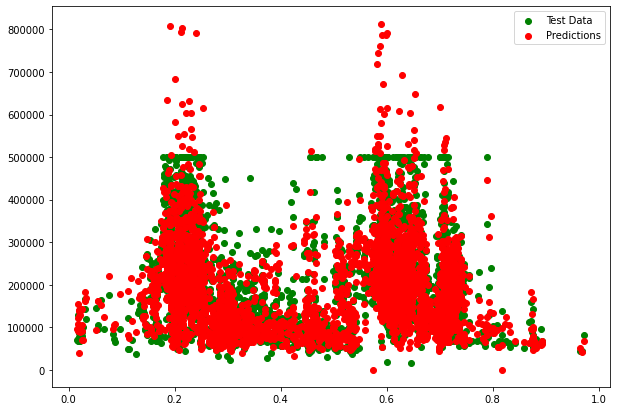

In [25]:
plot_predictions(predictions = y_pred)